In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from metrics_module import metrics
import matplotlib.pyplot as plt
import numpy as np
from dataloader_module import load_data
from imblearn.over_sampling import SMOTE


In [2]:

# Load and preprocess data
datafile = "data/healthcare-dataset-stroke-data.csv"
X, y = load_data(datafile)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.7057
Precision: 0.1313
Recall: 0.7925
F1 Score: 0.2252


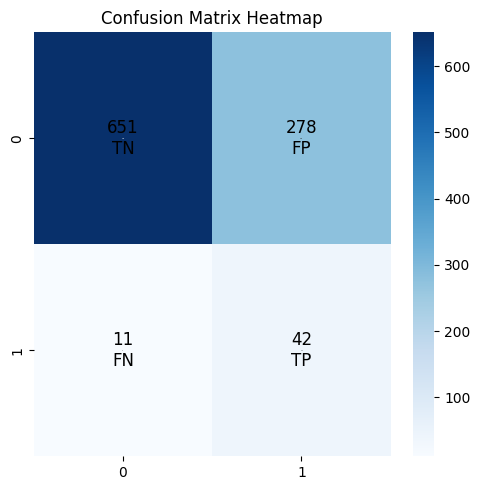

In [10]:
# Aplicar SMOTE per equilibrar les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar el model Random Forest amb les dades equilibrades
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train_resampled, y_train_resampled)

# Obtenir les probabilitats de predicció
y_proba = clf.predict_proba(X_test)[:, 1]

# Generar les prediccions amb el millor threshold
y_pred = (y_proba >= 0.07).astype(int)

# Guardar les prediccions en un fitxer .npy
np.save('predictions/predictions_random_forest.npy', y_pred)

# Avaluar el model
accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

In [3]:
from sklearn.model_selection import cross_val_score

# Definir el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Realizar k-fold cross validation
k = 5
cv_scores = cross_val_score(clf, X, y, cv=k)

# Imprimir los resultados
print(f"Scores for each fold: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")
print(f"Standard deviation: {cv_scores.std()}")

Scores for each fold: [0.95519348 0.95723014 0.95723014 0.95718654 0.95514781]
Mean accuracy: 0.9563976241044199
Standard deviation: 0.0010020543965471116
